In [4]:

import os, random
import numpy as np
import tensorflow as tf

BASE_PATH = '/content/drive/MyDrive/AI/Lab/Classification/Dataset_224'

# Safety checks
assert os.path.exists(BASE_PATH), f"Base path not found: {BASE_PATH}"

# Reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Hyperparameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32    # increase/decrease depending on GPU memory
CLASSES = ['Book', 'Khata']   # force class order
print("BASE_PATH:", BASE_PATH)
print("IMG_SIZE:", IMG_SIZE, "BATCH_SIZE:", BATCH_SIZE)
print("CLASSES:", CLASSES)


BASE_PATH: /content/drive/MyDrive/AI/Lab/Classification/Dataset_224
IMG_SIZE: (224, 224) BATCH_SIZE: 32
CLASSES: ['Book', 'Khata']


In [3]:
# Mount Drive for colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Dataset diagnostics
import os

print("\n FOLDER STRUCTURE CHECK:")
for split in ['Train', 'Val', 'Test']:
    split_path = os.path.join(BASE_PATH, split)
    print(f"\n {split}/ -> {split_path}")
    if os.path.exists(split_path):
        folders = sorted([d for d in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, d))])
        for folder in folders:
            folder_path = os.path.join(split_path, folder)
            files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg','.jpeg','.png','.bmp'))]
            print(f"   ├── {folder}/  ({len(files)} images)")
            for f in files[:2]:
                print(f"   │   └── {f}")
    else:
        print("   PATH NOT FOUND")



 FOLDER STRUCTURE CHECK:

 Train/ -> /content/drive/MyDrive/AI/Lab/Classification/Dataset_224/Train
   ├── Book/  (252 images)
   │   └── book_image_183.jpg
   │   └── book_image_237.jpg
   ├── Khata/  (250 images)
   │   └── khata_image_281.jpg
   │   └── khata_image_305.jpg

 Val/ -> /content/drive/MyDrive/AI/Lab/Classification/Dataset_224/Val
   ├── Book/  (101 images)
   │   └── book_image_171.jpg
   │   └── book_image_210.jpg
   ├── Khata/  (100 images)
   │   └── khata_image_101.jpg
   │   └── khata_image_110.jpg

 Test/ -> /content/drive/MyDrive/AI/Lab/Classification/Dataset_224/Test
   ├── Book/  (152 images)
   │   └── book_image_254.jpg
   │   └── book_image_308.jpg
   ├── Khata/  (150 images)
   │   └── khata_image_381.jpg
   │   └── khata_image_361.jpg


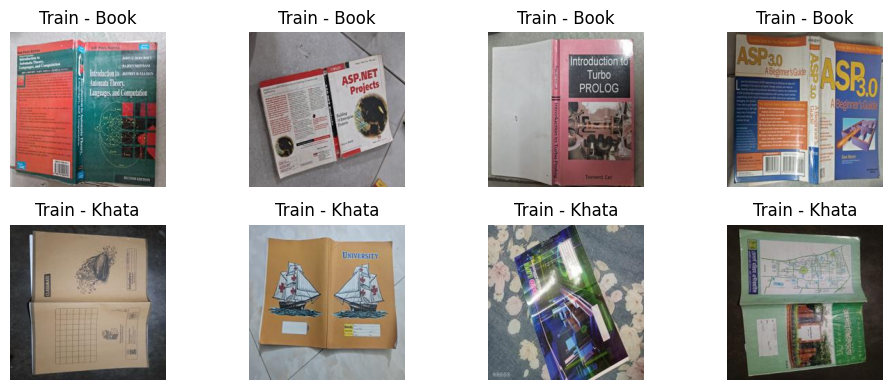

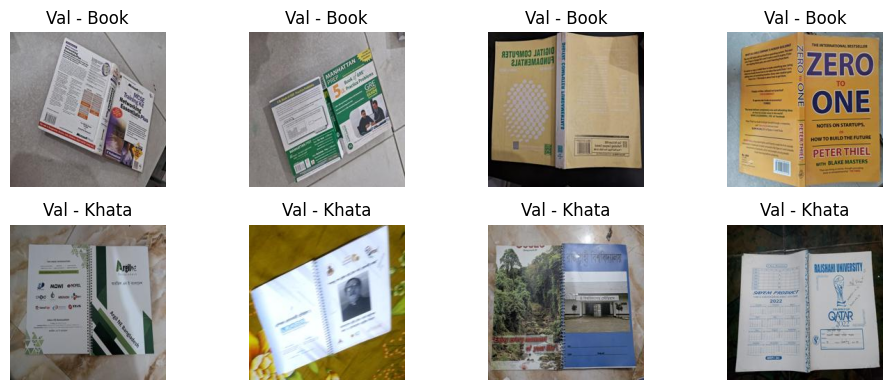

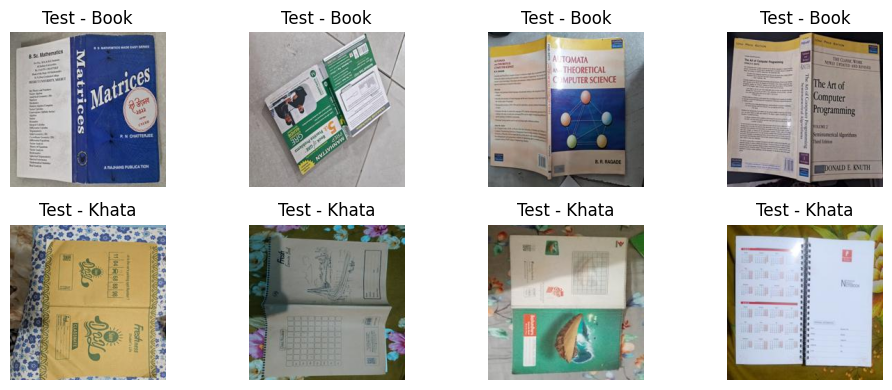

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define paths
base_path = "/content/drive/MyDrive/AI/Lab/Classification/Dataset_224"
splits = ['Train', 'Val', 'Test']
classes = ['Book', 'Khata']

# Helper function to plot sample images
def show_samples(base_path, split, classes, num_samples=4):
    plt.figure(figsize=(10, 4))
    for i, cls in enumerate(classes):
        folder = os.path.join(base_path, split, cls)
        images = os.listdir(folder)
        samples = random.sample(images, min(num_samples, len(images)))

        for j, img_name in enumerate(samples):
            img_path = os.path.join(folder, img_name)
            img = mpimg.imread(img_path)
            plt.subplot(len(classes), num_samples, i*num_samples + j + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{split} - {cls}")
    plt.tight_layout()
    plt.show()

# Show random samples from each split
for split in splits:
    show_samples(base_path, split, classes)


In [ ]:
# Data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(BASE_PATH, 'Train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True,
    seed=SEED,
    classes=CLASSES
)

val_generator = test_val_datagen.flow_from_directory(
    os.path.join(BASE_PATH, 'Val'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,
    seed=SEED,
    classes=CLASSES
)

test_generator = test_val_datagen.flow_from_directory(
    os.path.join(BASE_PATH, 'Test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,
    seed=SEED,
    classes=CLASSES
)

# quick summary
print("\nTrain samples:", train_generator.samples)
print("Val samples:", val_generator.samples)
print("Test samples:", test_generator.samples)
print("Class indices:", train_generator.class_indices)
print("Class distribution (train):", np.bincount(train_generator.classes))


Found 502 images belonging to 2 classes.
Found 201 images belonging to 2 classes.
Found 302 images belonging to 2 classes.

Train samples: 502
Val samples: 201
Test samples: 302
Class indices: {'Book': 0, 'Khata': 1}
Class distribution (train): [252 250]


In [1]:
images, labels = next(train_generator)

# Show a few images
plt.figure(figsize=(10, 10))
for i in range(9):  # show 9 samples
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")
    plt.axis("off")

plt.tight_layout()
plt.show()

NameError: name 'train_generator' is not defined

In [ ]:
# Verify class indices consistency
print("Train indices:", train_generator.class_indices)
print("Val   indices:", val_generator.class_indices)
print("Test  indices:", test_generator.class_indices)

if (train_generator.class_indices == val_generator.class_indices == test_generator.class_indices):
    print("CLASS INDICES MATCH")
else:
    print("CLASS INDICES DO NOT MATCH - check 'classes' ordering in flow_from_directory")


Train indices: {'Book': 0, 'Khata': 1}
Val   indices: {'Book': 0, 'Khata': 1}
Test  indices: {'Book': 0, 'Khata': 1}
CLASS INDICES MATCH


In [ ]:
#  Build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),#flatten()
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint1 = ModelCheckpoint('best_model_phase1.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
earlystop1  = EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, mode='max', verbose=1)
reduce_lr   = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-7, verbose=1)


In [ ]:
# Phase 1 training (frozen base)
EPOCHS_PHASE1 = 15

history1 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS_PHASE1,
    callbacks=[checkpoint1, earlystop1, reduce_lr],
    verbose=1
)


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6268 - loss: 0.6358
Epoch 1: val_accuracy improved from -inf to 0.87562, saving model to best_model_phase1.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.6352 - loss: 0.6250 - val_accuracy: 0.8756 - val_loss: 0.2962 - learning_rate: 0.0010
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8861 - loss: 0.2564
Epoch 2: val_accuracy improved from 0.87562 to 0.91542, saving model to best_model_phase1.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.8855 - loss: 0.2578 - val_accuracy: 0.9154 - val_loss: 0.1987 - learning_rate: 0.0010
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8866 - loss: 0.2310
Epoch 3: val_accuracy improved from 0.91542 to 0.94030, saving model to best_model_phase1.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.8882 - loss: 0.2285 - val_accuracy: 0.9403 - val_loss: 0.1599 - learning_rate: 0.0010
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9112 - loss: 0.2248
Epoch 4: val_accuracy improved from 0.94030 to 0.95025, saving model to best_model_phase1.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.9118 - loss: 0.2235 - val_accuracy: 0.9502 - val_loss: 0.1399 - learning_rate: 0.0010
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9533 - loss: 0.1362
Epoch 5: val_accuracy did not improve from 0.95025
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9530 - loss: 0.1376 - val_accuracy: 0.9453 - val_loss: 0.1458 - learning_rate: 0.0010
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9292 - loss: 0.1585
Epoch 6: val_accuracy did not improve from 0.95025
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9294 - loss: 0.1581 - val_accuracy: 0.9403 - val_loss: 0.1545 - learning_rate: 0.0010
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9510 - loss: 0.1291
Epoch 7: val_accuracy improved from 0.95025 to 0.96020, saving model to best_model_phase1.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.9504 - loss: 0.1307 - val_accuracy: 0.9602 - val_loss: 0.1198 - learning_rate: 0.0010
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9715 - loss: 0.0882
Epoch 8: val_accuracy did not improve from 0.96020
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9706 - loss: 0.0896 - val_accuracy: 0.9602 - val_loss: 0.1207 - learning_rate: 0.0010
Epoch 9/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9455 - loss: 0.1567
Epoch 9: val_accuracy did not improve from 0.96020
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9455 - loss: 0.1569 - val_accuracy: 0.9502 - val_loss: 0.1159 - learning_rate: 0.0010
Epoch 10/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9502 - loss: 0.1331
Epoch 10: val_accuracy did not improve from 0.96020
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9502 - loss: 0.1326 - val_accuracy: 0.9453 - val_loss: 0.1410 - learning_rate: 0.0010
Epoch 11/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0

16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9547 - loss: 0.0916 - val_accuracy: 0.9751 - val_loss: 0.0887 - learning_rate: 0.0010
Epoch 15/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9660 - loss: 0.0940
Epoch 15: val_accuracy did not improve from 0.97512
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.9662 - loss: 0.0943 - val_accuracy: 0.9602 - val_loss: 0.0898 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 14.


In [ ]:
# Unfreeze & fine-tune
# Unfreeze last 30 layers of base model
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Recompile with a lower LR
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

checkpoint2 = ModelCheckpoint('best_model_phase2.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
earlystop2  = EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True, mode='max', verbose=1)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 1,690,497 (6.45 MB)

 Non-trainable params: 731,584 (2.79 MB)

In [ ]:
# Phase 2 training (fine-tune)
EPOCHS_PHASE2 = 25

history2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS_PHASE1 + EPOCHS_PHASE2,  # total epochs value (not strictly needed)
    initial_epoch=len(history1.history['loss']),
    callbacks=[checkpoint2, earlystop2, reduce_lr],
    verbose=1
)


Epoch 16/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8769 - loss: 0.2593
Epoch 16: val_accuracy improved from -inf to 0.95522, saving model to best_model_phase2.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.8782 - loss: 0.2573 - val_accuracy: 0.9552 - val_loss: 0.1139 - learning_rate: 1.0000e-04
Epoch 17/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9444 - loss: 0.1335
Epoch 17: val_accuracy did not improve from 0.95522
16/16 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.9448 - loss: 0.1322 - val_accuracy: 0.9552 - val_loss: 0.1107 - learning_rate: 1.0000e-04
Epoch 18/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9689 - loss: 0.0740
Epoch 18: val_accuracy did not improve from 0.95522
16/16 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.9687 - loss: 0.0746 - val_accuracy: 0.9453 - val_loss: 0.1665 - learning_rate: 1.0000e-04
Epoch 19/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9885 - loss: 0.0389
Epoch 19: val_accuracy did not improve from 0.95522
16/16 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.9878 - loss: 0.0406 - val_accuracy: 0.9254 - val_loss: 0.2143 - learning_rate: 1.0000e-04
Epoch 20/40
16/16 ━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.9811 - loss: 0.0388 - val_accuracy: 0.9701 - val_loss: 0.0945 - learning_rate: 1.0000e-04
Epoch 22/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9970 - loss: 0.0120
Epoch 22: val_accuracy did not improve from 0.97015
16/16 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.9968 - loss: 0.0124 - val_accuracy: 0.9701 - val_loss: 0.0961 - learning_rate: 1.0000e-04
Epoch 23/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9781 - loss: 0.0673
Epoch 23: val_accuracy did not improve from 0.97015
16/16 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.9784 - loss: 0.0659 - val_accuracy: 0.9701 - val_loss: 0.1107 - learning_rate: 1.0000e-04
Epoch 24/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9930 - loss: 0.0169
Epoch 24: val_accuracy did not improve from 0.97015
16/16 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - accuracy: 0.9930 - loss: 0.0171 - val_accuracy: 0.9652 - val_loss: 0.1359 - learning_rate: 1.0000e-04
Epoch 25/40
16/16 ━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New section

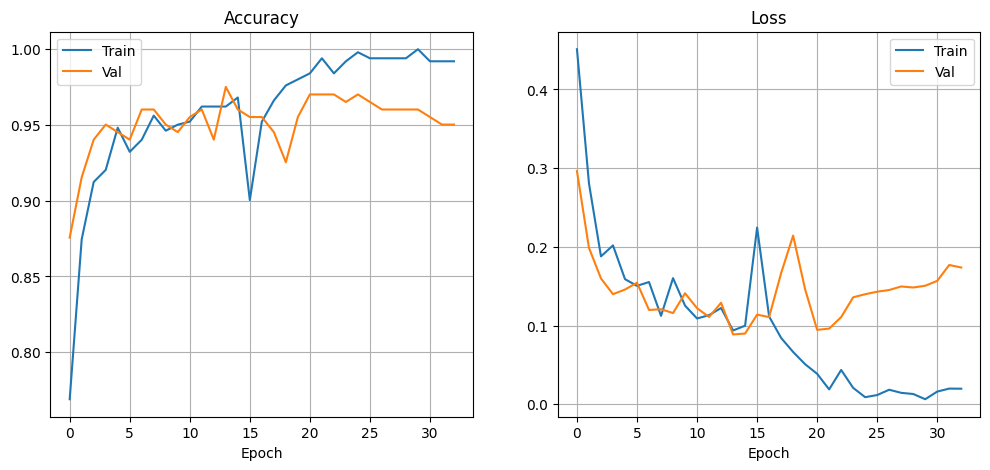

In [ ]:
# Combine histories and plot
import matplotlib.pyplot as plt

# Merge histories
for k in history1.history:
    history1.history[k].extend(history2.history.get(k, []))
history = history1

# Plot accuracy & loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss'); plt.xlabel('Epoch'); plt.legend(); plt.grid(True)
plt.show()


In [ ]:
# Test evaluation & detailed report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"Test accuracy: {test_acc*100:.2f}%, Test loss: {test_loss:.4f}")

# predictions
test_generator.reset()
preds = model.predict(test_generator, verbose=0)
pred_classes = (preds > 0.5).astype(int).flatten()
true_classes = test_generator.classes
class_names = list(test_generator.class_indices.keys())

print("\nClassification report:")
print(classification_report(true_classes, pred_classes, target_names=class_names))

print("\nConfusion matrix:")
cm = confusion_matrix(true_classes, pred_classes)
print(cm)


10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9678 - loss: 0.0982
Test accuracy: 96.69%, Test loss: 0.0912

Classification report:
              precision    recall  f1-score   support

        Book       0.96      0.97      0.97       152
       Khata       0.97      0.96      0.97       150

    accuracy                           0.97       302
   macro avg       0.97      0.97      0.97       302
weighted avg       0.97      0.97      0.97       302


Confusion matrix:
[[148   4]
 [  6 144]]


In [ ]:
#  Save final model

model.save("Book_vs_Khata_Classification_Model.keras")
model.save("Book_vs_Khata_Classification_Model.h5")

print("Models saved successfully as:")
print(" - Book_vs_Khata_Classification_Model.keras  (recommended)")
print(" - Book_vs_Khata_Classification_Model.h5     (legacy / compatibility)")


✅ Models saved successfully as:
 - Book_vs_Khata_Classification_Model.keras  (recommended)
 - Book_vs_Khata_Classification_Model.h5     (legacy / compatibility)


In [ ]:
# Prediction helper
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import os

def predict_image(img_path, model=model, class_names=class_names):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    arr = image.img_to_array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)
    score = model.predict(arr, verbose=0)[0][0]
    pred = 1 if score > 0.5 else 0
    confidence = score*100 if pred==1 else (1-score)*100
    label = class_names[pred]
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{label} ({confidence:.1f}%)")
    plt.show()
    print(f"Raw score: {score:.4f} → Predicted: {label}, Confidence: {confidence:.2f}%")
    return label, confidence

predict_image('/content/drive/MyDrive/AI/Lab/Classification/Dataset_224/Test/Book/book_image_101.jpg')
predict_image('/content/drive/MyDrive/AI/Lab/Classification/Dataset_224/Test/Book/book_image_11.jpg')

predict_image('/content/drive/MyDrive/AI/Lab/Classification/Dataset_224/Test/Khata/khata_image_100.jpg')
predict_image('/content/drive/MyDrive/AI/Lab/Classification/Dataset_224/Test/Khata/khata_image_152.jpg')

NameError: name 'model' is not defined

In [ ]:
# For clean up and unreadble image removal

import os
from PIL import Image


BASE_PATH = '/content/drive/MyDrive/AI/Lab/Classification/Dataset_224'
splits = ["Train", "Val", "Test"]

bad_files = []

for split in splits:
    split_path = os.path.join(BASE_PATH, split)
    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        if not os.path.isdir(cls_path):
            continue

        for fname in os.listdir(cls_path):
            fpath = os.path.join(cls_path, fname)
            try:
                with Image.open(fpath) as img:
                    img.verify()  # check if readable
            except Exception as e:
                bad_files.append(fpath)
                print(f"⚠️ Bad file: {fpath} | {e}")

print(f"\nTotal unreadable images found: {len(bad_files)}")

for f in bad_files:
    try:
        os.remove(f)
        print(f"🗑️ Removed {f}")
    except Exception as e:
        print(f"⚠️ Could not remove {f}: {e}")



In [ ]:
# Load necessary libraries and the trained model
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Define IMG_SIZE as it's used by the predict_image function
IMG_SIZE = (224, 224)

# Load the trained model
model = load_model("best_model_phase2.h5")

# Define class_names as it's used by the predict_image function
# Assuming the class names are the same as defined earlier
class_names = ['Book', 'Khata']

print("Model and class_names loaded successfully.")